In [4]:
import pandas as pd
import numpy as np
file = '../../../DATA/OSA_class_bin.xlsx'
data = pd.read_excel(file)
df = pd.DataFrame(data)
df.head()
df = df.drop(['IAH','Smoker', 'Snorer', 'Illness'], axis=1)
df.head()

,Patient,Gender,Weight,Height,Age,Cervical,OSA,BMI
0,P0005,1,80,173,32,40,Healthy,26.729927
1,P0006,1,109,190,32,42,Healthy,30.193906
2,P0007,1,86,169,39,42,Severe,30.110991
3,P0008,1,145,172,47,44,Severe,49.012980
4,P0013,1,90,180,36,40,Healthy,27.777778


In [5]:
#Index transformation--> NO HACE FALTA (?)wtf
#LABEL ENCODING
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['OSA_label']=le.fit_transform(df['OSA'])
df.head()

#ONEHOT creo que no vale para target value
enc = preprocessing.OneHotEncoder()
# passing OSA cats column (label encoded values of bridge_types)
OSA_oneHot = pd.DataFrame(enc.fit_transform(df[['OSA']]).toarray())
# merge with main df on key values
df = df.join(OSA_oneHot)

In [6]:
df.head()

,Patient,Gender,Weight,Height,Age,Cervical,OSA,BMI,OSA_label,0,1
0,P0005,1,80,173,32,40,Healthy,26.729927,0,1.0,0.0
1,P0006,1,109,190,32,42,Healthy,30.193906,0,1.0,0.0
2,P0007,1,86,169,39,42,Severe,30.110991,1,0.0,1.0
3,P0008,1,145,172,47,44,Severe,49.012980,1,0.0,1.0
4,P0013,1,90,180,36,40,Healthy,27.777778,0,1.0,0.0


In [7]:
df.set_index('Patient', inplace=True)

In [8]:
#features 
predictors = ['Gender','Weight', 'Height', 'Age', 'Cervical', 'BMI']

x = df[predictors].values
y = df['OSA_label'].values



# FUNCIONES PARA VISUALIZAR

In [44]:
import matplotlib.pyplot as plt
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
outcomes = ['Healthy','Severe']

accuracies = []

# Logistic Regression
### Grid search

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {"C": np.logspace(-3,3,7), "penalty" : ["l1","l2"]}


logreg_2 = LogisticRegression()
logreg_2_cv = GridSearchCV(logreg_2,param_grid,cv = 10)
logreg_2_cv.fit(x,y)
print("tuned hyperparameters 1: (best parameters): ", logreg_2_cv.best_params_)
print("accuracy: ", logreg_2_cv.best_score_)



/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

tuned hyperparameters 1: (best parameters):  {'C': 0.001, 'penalty': 'l2'}
accuracy:  0.7321341463414635


/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/beatrizesteban/opt/anaconda3/lib/python3.

Accuracy for logistic regression 1:  0.7224028906955735
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       242
           1       0.69      0.56      0.62       165

    accuracy                           0.72       407
   macro avg       0.72      0.70      0.70       407
weighted avg       0.72      0.72      0.72       407

Confusion matrix, without normalization
[[207  35]
 [ 76  89]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       242
           1       0.72      0.54      0.62       165

    accuracy                           0.73       407
   macro avg       0.72      0.70      0.70       407
weighted avg       0.73      0.73      0.72       407

Accuracy for logistic regression 2:  0.7273110508882866
Area under the ROC:  0.6973829201101929
Average precision-recall score: 0.57


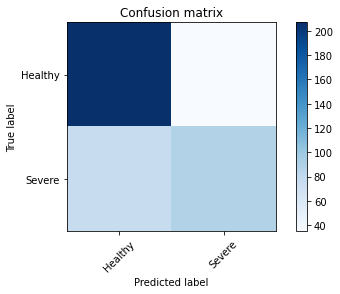

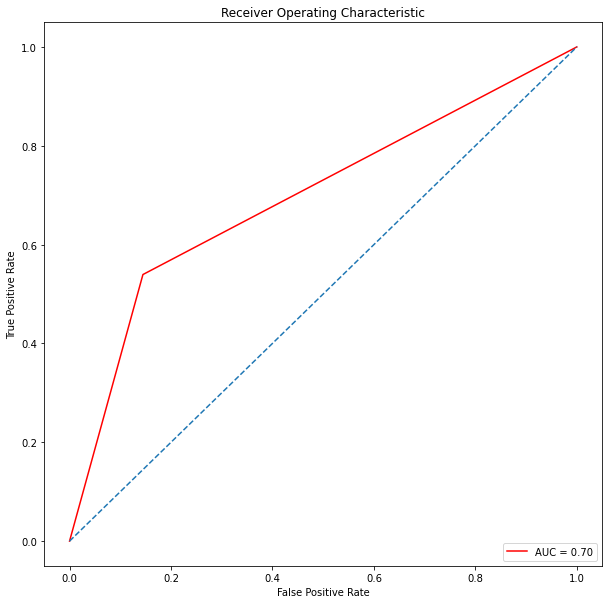

In [53]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

log_reg_1 = LogisticRegression(penalty='l1', solver='saga')
log_reg_2 = LogisticRegression(C = 0.001, penalty='l2')
y_fit = cross_validate(log_reg_2,x, y)

accuracy_reg1 = cross_val_score(log_reg_1, x, y, cv = 5)
y_out1 = cross_val_predict(log_reg_1, x, y, cv=5)
report1=metrics.classification_report(y, y_out1)


print("Accuracy for logistic regression 1: ", np.average(accuracy_reg1))
print(report1)


accuracy_reg2 = cross_val_score(log_reg_2, x, y, cv = 5)
y_out2 = cross_val_predict(log_reg_2, x, y, cv=5)
report2=metrics.classification_report(y, y_out2)

### PLOT CONFUSION MATRIX ###
# Not normalized
cm = metrics.confusion_matrix(y, y_out2)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_out2)
roc_auc_reg = auc(false_positive_rate, true_positive_rate)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc_reg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

from sklearn.metrics import average_precision_score
average_precision_reg = average_precision_score(y, y_out2)

print(report2)
print("Accuracy for logistic regression 2: ", np.average(accuracy_reg2))
print("Area under the ROC: ", roc_auc_reg)
print('Average precision-recall score: {0:0.2f}'.format(average_precision_reg))

In [45]:
accuracies.append(accuracy_reg)
print(accuracies)

[array([0.73, 0.71, 0.77, 0.73, 0.7 ])]


In [30]:
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(y_fit, x, y)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

ValueError: dict should be a binary classifier

# KNN

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors" :np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv = 10)
knn_cv.fit(x,y)

print("tuned hyperparameters: (best parameters): ", knn_cv.best_params_)
print("accuracy: ", knn_cv.best_score_)

tuned hyperparameters: (best parameters):  {'n_neighbors': 9}
accuracy:  0.7566463414634146


Confusion matrix, without normalization
[[194  48]
 [ 59 106]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       242
           1       0.69      0.64      0.66       165

    accuracy                           0.74       407
   macro avg       0.73      0.72      0.72       407
weighted avg       0.73      0.74      0.74       407

Average accuracy of KNN: 0.7370671484492621
Area under the ROC 0.722038567493113
Average precision-recall score: 0.59


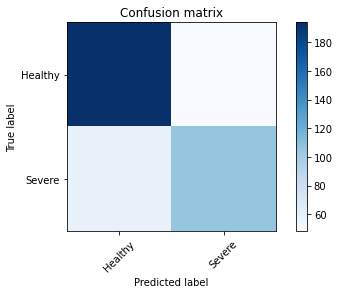

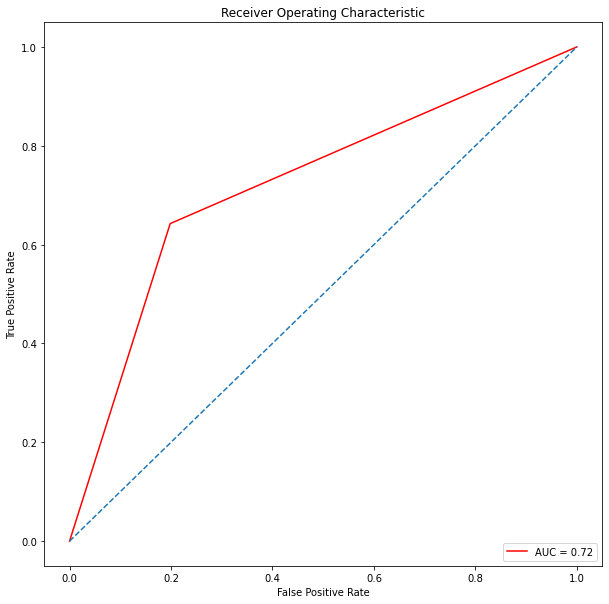

In [54]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection

knn = KNeighborsClassifier(n_neighbors=9)
accuracy_knn = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
y_out = cross_val_predict(knn, x, y, cv=5)
report_knn = metrics.classification_report(y, y_out)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_out)
roc_auc_knn = auc(false_positive_rate, true_positive_rate)

# Plot ROC 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc_knn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

from sklearn.metrics import average_precision_score
average_precision_knn = average_precision_score(y, y_out)

print(report_knn)
print('Average accuracy of KNN:', np.average(accuracy_knn))
print ("Area under the ROC", roc_auc_knn)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_knn))

[array([0.73, 0.71, 0.77, 0.73, 0.7 ]), array([0.77, 0.72, 0.72, 0.74, 0.74]), array([0.77, 0.72, 0.72, 0.74, 0.74])]


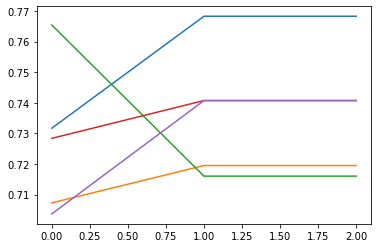

In [47]:
accuracies.append(accuracy_knn)
print(accuracies)
plt.plot(accuracies)

# SVM

### Linear

Confusion matrix, without normalization
[[213  29]
 [ 90  75]]
              precision    recall  f1-score   support

           0       0.70      0.88      0.78       242
           1       0.72      0.45      0.56       165

    accuracy                           0.71       407
   macro avg       0.71      0.67      0.67       407
weighted avg       0.71      0.71      0.69       407

Average accuracy of svm: 0.7075579644685336
Area under the ROC: 0.6673553719008265
Average precision-recall score: 0.55


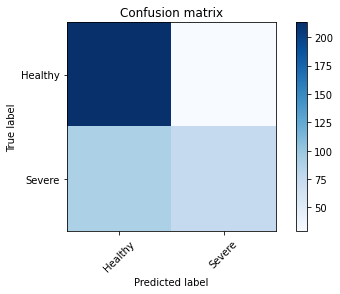

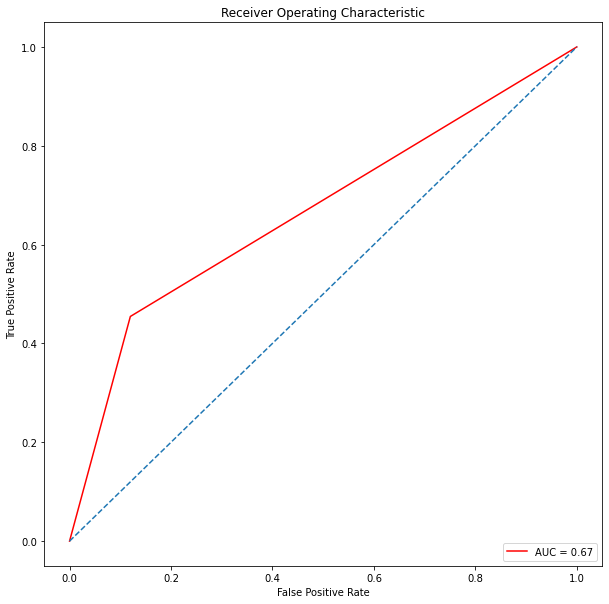

In [55]:
from sklearn.svm import SVC
svm = SVC()
accuracy_svm = cross_val_score(svm, x, y, cv=5, scoring='accuracy')
y_out = cross_val_predict(svm, x, y, cv=5)
#Report 
report_svm = metrics.classification_report(y, y_out)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_out)
roc_auc_svm = auc(false_positive_rate, true_positive_rate)

# Plot ROC 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

from sklearn.metrics import average_precision_score
average_precision_svm = average_precision_score(y, y_out)

print(report_svm)
print('Average accuracy of svm:', np.average(accuracy_svm))
print ("Area under the ROC:", roc_auc_svm)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_svm))


# Decision Tree

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth" :np.arange(0,7)}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree,param_grid,cv = 10)
tree_cv.fit(x,y)

print("tuned hyperparameters: (best parameters): ", tree_cv.best_params_)
print("accuracy: ", tree_cv.best_score_)

tuned hyperparameters: (best parameters):  {'max_depth': 4}
accuracy:  0.7320731707317074


/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:54

Confusion matrix, without normalization
[[170  72]
 [ 71  94]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       242
           1       0.57      0.57      0.57       165

    accuracy                           0.65       407
   macro avg       0.64      0.64      0.64       407
weighted avg       0.65      0.65      0.65       407

Average accuracy of tree: 0.6440529960855164
Area under the ROC 0.6360881542699725
Average precision-recall score: 0.50


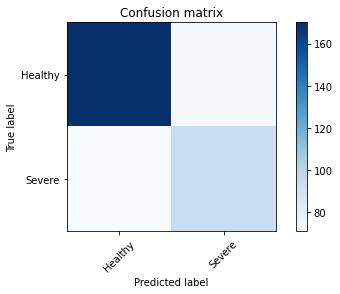

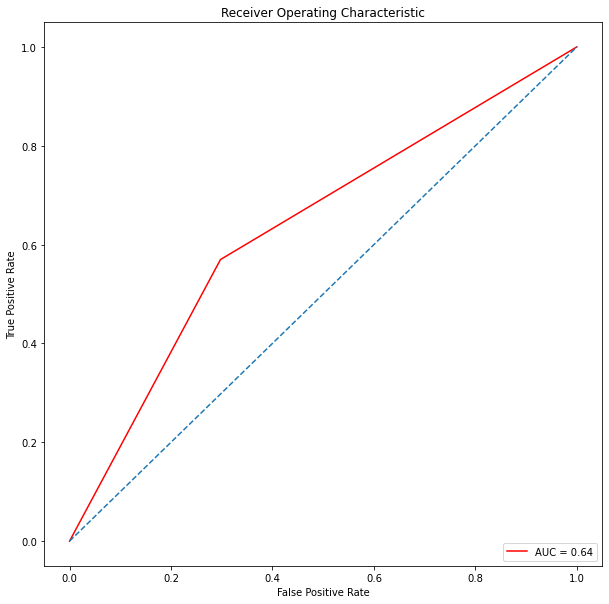

In [56]:
tree = DecisionTreeClassifier()
accuracy_tree = cross_val_score(tree, x, y, cv=5, scoring='accuracy')
y_out = cross_val_predict(tree, x, y, cv=5)
#Report 
report_tree = metrics.classification_report(y, y_out)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_out)
roc_auc_tree = auc(false_positive_rate, true_positive_rate)

# Plot ROC 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc_tree)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

from sklearn.metrics import average_precision_score
average_precision_tree = average_precision_score(y, y_out)

print(report_tree)
print('Average accuracy of tree:', np.average(accuracy_tree))
print ("Area under the ROC", roc_auc_tree)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_tree))